# Homework 6

In [1]:
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
#import Quandl
import statsmodels.formula.api as smf
from scipy import stats
from pandas.stats.api import ols
from sklearn import linear_model
pylab.rcParams['figure.figsize'] = [12,8]

Populating the interactive namespace from numpy and matplotlib


# Task 1 (5% credit) 
Provide a definition for the concept of a conjugate prior given the Bayesian learning model. What is the conjugate prior for the univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a fixed $\sigma$?

### If the posterior distributions p(θ|x) are in the same family as the prior probability distribution p(θ), the prior and posterior are then called conjugate distributions, and the prior is called a conjugate prior for the likelihood function.
### If the likelihood function is Gaussian, choosing a Gaussian prior over the mean will ensure that the posterior distribution is also Gaussian. This means that the Gaussian distribution is a conjugate prior for the likelihood that is also Gaussian.

# Task 2 (5% credit). 
Which prior in the Bayesian linear regression framework leads to: a) Ridge regression, b) Lasso regression?


#### All the components of $w$ having the same prior $w_j\sim{\cal N}(0,\sigma/\sqrt{\lambda})$ leads to Ridge regression.
#### The Laplacian prior distribution $p(w_j)\sim e^{-\lambda|w_j|/\sigma}$ leads to Lasso regression.

# Task 3 (10% credit). 
Answer some questions about the properties of Lasso/Ridge:

a) Which of the Lasso and Ridge regressions possess an analytic solution in the closed form?

#### Ridge regression

b) Which of the Lasso and Ridge regressions often use to completely eliminate coefficients for some of the regressors?

#### Lasson regression

c) Which value of $\lambda$ makes Lasso and Ridge identical to the ordinary least square regression?

#### when $\lambda$ = 0 

d) What dataset (training, validation or test) you would use to estimate the $\lambda$ for Lasso or Ridge?

#### validation dataset

# Task 4 (15% credit). 
Consider a Bayesian univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a given $\sigma=1$ and the prior $w\sim {\cal N}(5,1)$. Compute the posterior distribution after an observation $y=12,x=2$. After all, what is the probability of having $w<5$?

In [218]:
import scipy.stats as stats
print ("The probability of having w < 5 is: {}".format(stats.norm.cdf(5, loc=5.8, scale=1/5**0.5)))

The probability of having w < 5 is: 0.0368191350602


# Task 5 (20% credit). 
For the training and test sets provided below, train a linear regression of $y$ (last column) vs the rest of the columns of the table treated as regressors (intercept excluded) over the training set, apply it to the test set and report it's R2 performance over both - training and test set.

In [203]:
data_train=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session2/HW/Homework1_training.csv")
y_train=np.asarray(data_train.iloc[:,-1]) # make dependent variable
X_train=np.asarray(data_train.iloc[:,1:-2]) #make independent variables

data_test=pd.read_csv("https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session2/HW/Homework1_test.csv")
y_test=np.asarray(data_test.iloc[:,-1]) # make dependent variable
X_test=np.asarray(data_test.iloc[:,1:-2]) #make independent variables


#### The column 39 has been left and I'm not sure why...

In [185]:
data_train.shape

(30, 42)

In [186]:
data_train.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,31,32,33,34,35,36,37,38,39,40
0,0,97.0,84.993531,24.300457,30.863846,-50.066189,18.879159,167.926580,93.749684,177.561130,...,42.0,65.0,36.0,34.0,60.0,23.0,44.0,61.0,65.0,65.205997
1,1,41.0,35.636548,6.302279,14.119293,-22.658359,6.912916,70.939474,41.480651,76.031059,...,73.0,46.0,46.0,0.0,53.0,62.0,22.0,72.0,8.0,49.676983
2,2,31.0,26.822800,3.088319,11.129194,-17.764103,4.776086,53.620348,32.146895,57.900690,...,18.0,28.0,44.0,75.0,16.0,3.0,71.0,45.0,18.0,11.557130
3,3,32.0,27.704175,3.409715,11.428204,-18.253529,4.989769,55.352260,33.080271,59.713727,...,99.0,2.0,21.0,95.0,31.0,23.0,97.0,12.0,47.0,14.632636
4,4,70.0,61.196414,15.622764,22.790580,-36.851699,13.109720,121.164939,68.548543,128.609132,...,72.0,86.0,99.0,6.0,90.0,39.0,86.0,61.0,84.0,54.682430


In [187]:
shape(X_train)

(30, 39)

In [188]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [189]:
print ('R2 performance for training sample: {}'.format(regr.score(X_train, y_train)))

R2 performance for training sample: 0.999999988625


In [190]:
print ('R2 performance for test sample: {}'.format(regr.score(X_test, y_test)))

R2 performance for test sample: -4.31435989859


# Task 6 (20% credit). 
Train Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=40000$ and $\lambda_{Lasso}=40$ and report their performance over the test set.

In [191]:
Ridge=linear_model.Ridge(fit_intercept=True, alpha=40000) 

Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train) # predict X_train for in-sample square, predict X_test for out_sample square...
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_

#Out of sample
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for IS Ridge is: 0.844237185406
The R-squared we found for OS Ridge is: 0.678556452341


In [192]:
Lasso=linear_model.Lasso(fit_intercept=True,alpha=40)
#try Ridge with a selected regularization parameter lambda

Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Ridge))

Lasso_coef=Lasso.coef_
#Out of sample
p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Lasso is: 0.844237185406
The R-squared we found for OS Lasso is: 0.671937901107


# Task 7 (25% credit). 
For each $m=1,2,...39$ train OLS, Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=40000$ and $\lambda_{Lasso}=40$ using the first $m$ columns of the data tables as the regressors and plot the in-sample (training) and out-of-sample (test) R2 for all three models on the same graph.

In [204]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [205]:
X_train.columns = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15',
                'x16','x16','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30'
               ,'x31','x32','x33','x34','x35','x36','x37','x38']
X_test.columns = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15',
                'x16','x16','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30'
               ,'x31','x32','x33','x34','x35','x36','x37','x38']
y_test.columns = ['Y']
y_train.columns = ['Y']

In [206]:
train = pd.concat([X_train,y_train], axis = 1)
test = pd.concat([X_test,y_test], axis = 1)
data = pd.concat([train,test], axis = 0)

In [207]:
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x30,x31,x32,x33,x34,x35,x36,x37,x38,Y
0,97.0,84.993531,24.300457,30.863846,-50.066189,18.879159,167.926580,93.749684,177.561130,26.967126,...,76.0,42.0,65.0,36.0,34.0,60.0,23.0,44.0,61.0,65.205997
1,41.0,35.636548,6.302279,14.119293,-22.658359,6.912916,70.939474,41.480651,76.031059,9.942734,...,53.0,73.0,46.0,46.0,0.0,53.0,62.0,22.0,72.0,49.676983
2,31.0,26.822800,3.088319,11.129194,-17.764103,4.776086,53.620348,32.146895,57.900690,6.902664,...,51.0,18.0,28.0,44.0,75.0,16.0,3.0,71.0,45.0,11.557130
3,32.0,27.704175,3.409715,11.428204,-18.253529,4.989769,55.352260,33.080271,59.713727,7.206671,...,63.0,99.0,2.0,21.0,95.0,31.0,23.0,97.0,12.0,14.632636
4,70.0,61.196414,15.622764,22.790580,-36.851699,13.109720,121.164939,68.548543,128.609132,18.758937,...,14.0,72.0,86.0,99.0,6.0,90.0,39.0,86.0,61.0,54.682430


In [197]:
# An anonymous function that returns your regression model for future usage
Regress = lambda feature: smf.ols(formula = 'Y ~ %s'%feature, data = train).fit()

# For displaying R^2 and linear model summary
def modelEval(lm, key = 'Y'):
    lmy = lm.predict(test)
    y_err = lmy - test[key]
    y_norm = test[key]-np.mean(test[key])
    return 1-y_err.dot(y_err)/y_norm.dot(y_norm)  # R2 w.r.t. test set

In [212]:
y_train=data_train.iloc[:,-1]
y_test=data_test.iloc[:,-1]

In [213]:
y_train.name = ("Y")
y_test.name = ("Y")

In [199]:
Number_variables=range(len(data.columns[:-1]))

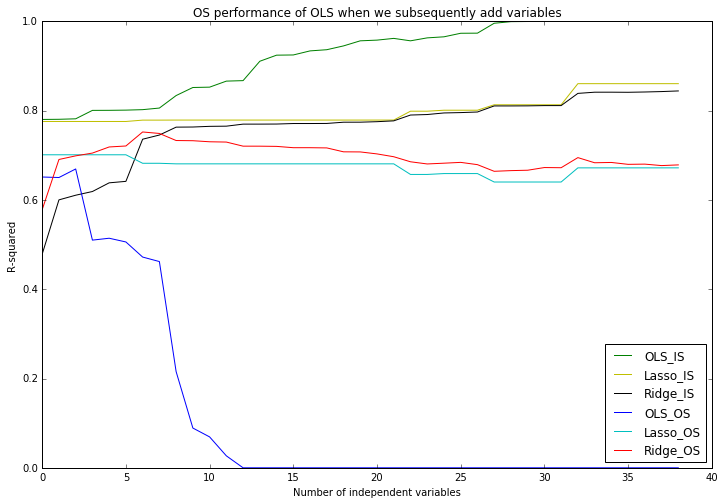

In [214]:
OLS_R_2_OS_F=[]
OLS_R_2_IS_F=[]
OLS_R_2_Ridge_OS_F=[]
OLS_R_2_Ridge_IS_F=[]
OLS_R_2_Lasso_OS_F=[]
OLS_R_2_Lasso_IS_F=[]

Ridge=linear_model.Ridge(fit_intercept=True,alpha=40000)
Lasso=linear_model.Lasso(fit_intercept=True, alpha=40)

for j in Number_variables:
    # OLS
    lm = smf.ols(formula = 'Y ~ '+ '+'.join(data.columns[:j+1]), 
                 data = pd.concat([X_train.ix[:,:j+1],y_train], axis = 1)).fit()
    error = lm.predict(X_test.ix[:,:j+1]) - y_test
    R_2_OS_OLS=1-error.var()/y_test.var()
    R_2_IS_OLS = lm.rsquared
    OLS_R_2_IS_F.append(R_2_IS_OLS)
    OLS_R_2_OS_F.append(max(R_2_OS_OLS,0))
    
    # Ridge
    Ridge.fit(X_train.ix[:,:j+1],y_train)
    
    # In sample:
    err_IS=Ridge.predict(X_train.ix[:,:j+1]) - y_train
    R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Ridge_IS_F.append(R_2_IS_Ridge)
    
    #Out of sample
    err_OS=Ridge.predict(X_test.ix[:,:j+1]) - y_test
    R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
    OLS_R_2_Ridge_OS_F.append(max(R_2_OS_Ridge,0))

    # Lasso
    
    Lasso.fit(X_train.ix[:,0:j+1],y_train)
    
    #In sample:
    p_IS=Lasso.predict(X_train.ix[:,0:j+1])
    err_IS=p_IS-y_train
    R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
    OLS_R_2_Lasso_IS_F.append(R_2_IS_Lasso)

    #Out of sample
    p_OS=Lasso.predict(X_test.ix[:,0:j+1])
    err_OS=p_OS-y_test
    R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
    OLS_R_2_Lasso_OS_F.append(max(R_2_OS_Lasso,0))

plt.title('OS performance of OLS when we subsequently add variables')

plt.plot(Number_variables,OLS_R_2_IS_F,'g',label='OLS_IS')
plt.plot(Number_variables,OLS_R_2_Lasso_IS_F,'y',label='Lasso_IS')
plt.plot(Number_variables,OLS_R_2_Ridge_IS_F,'k',label='Ridge_IS')

plt.plot(Number_variables,OLS_R_2_OS_F,'b',label='OLS_OS')
plt.plot(Number_variables,OLS_R_2_Lasso_OS_F,'c',label='Lasso_OS')
plt.plot(Number_variables,OLS_R_2_Ridge_OS_F,'r',label='Ridge_OS')

plt.legend(loc='lower right')
plt.xlabel('Number of independent variables')
plt.ylabel('R-squared')
plt.show()

# Extracredit (25%)
Using a series of 10 random splits (cross-validation) of the training sample into approximately 60% training and 40% validation samples perform the selection of the optimal $\lambda$ for Ridge and Lasso regression: for each $\lambda$ of the considered sequence compute an average validation R2 for the 10 splits considered and finally select the $\lambda$ having the highest value for this average R2. Visualize the dependence of the said average cross-validation R2 over $\lambda$ for Lasso and Ridge. Report the R2 computed over the test set for the Lasso and Ridge trained over the entire training set with the selected optimal values of $\lambda$.

In [219]:
## 
#Find the Alpha and report best test performance for Ridge/Lasso.
def Regularization_fit_lambda(model,X_train,y_train,lambdas,p=0.4,Graph=False, logl=False):
    #model = 1-Ridge, 2-Lasso
    #lambdas: a list of lambda values to try
    #p: ratio of the validation sample size / total training size
    #Graph: plot the graph of R^2 values for different lambda

    R_2_OS=[]
    X_train0, X_valid, y_train0, y_valid = train_test_split(X_train,
                                    y_train, test_size = 0.4, random_state = 200)

    if model==1:
        RM = lambda a: linear_model.Ridge(fit_intercept=True, alpha=a)
        model_label='Ridge'
    else:
        RM = lambda a: linear_model.Lasso(fit_intercept=True, alpha=a)
        model_label='Lasso'
    
    best_R2 = -1
    best_lambda = lambdas[0]
    
    for i in lambdas:
        lm = RM(i)
        lm.fit(X_train0,y_train0)  #fit the regularization model
        y_predict=lm.predict(X_valid) #compute the prediction for the validation sample 
        err_OS=y_predict-y_valid
        R_2_OS_=1-np.var(err_OS)/np.var(y_valid)
        R_2_OS.append(R_2_OS_)
        if R_2_OS_ > best_R2:
            best_R2 = R_2_OS_
            best_lambda = i
    
    if Graph==True:
        plt.title('Validation R-squared for different Lambda')
        if logl:
            plt.xlabel('ln(Lambda)')
            l=log(lambdas)
            bl=log(best_lambda)
        else:
            plt.xlabel('Lambda')
            l=lambdas
            bl=best_lambda
        plt.plot(l,R_2_OS,'b',label=model_label)
        plt.legend(loc='upper right')
        plt.ylabel('R-squared')
        plt.axvline(bl,color='r',linestyle='--')

        plt.show()
    
    return best_lambda

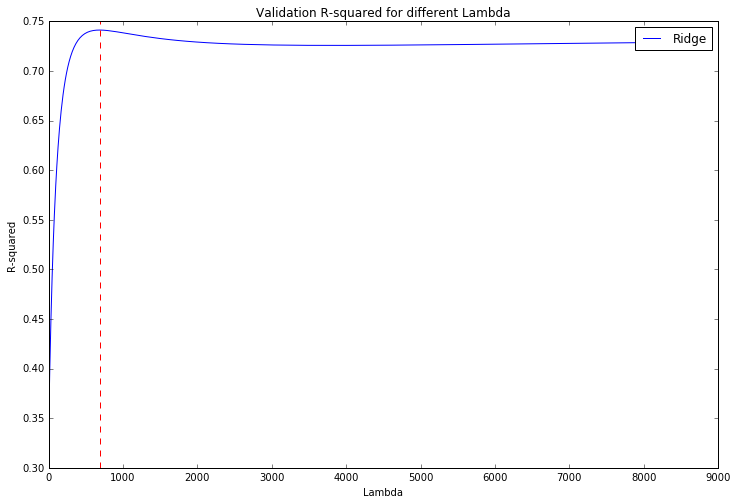

Optimal lambda for Ridge=690.688165728


In [224]:
#select best lambda for Ridge
lambdas = np.exp(np.linspace(-5,9,200)) ## exponential function increase fast....
lambda_r_optimal=Regularization_fit_lambda(1,X_train,y_train,lambdas,p=0.4,Graph=True)
print('Optimal lambda for Ridge={0}'.format(lambda_r_optimal))

In [226]:
Ridge = linear_model.Ridge(fit_intercept=True,alpha=lambda_r_optimal) #try Ridge with a selected regularization parameter lambda

Ridge.fit(X_train,y_train)
# In the sample:
p_IS=Ridge.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Ridge=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Ridge is: {0}".format(R_2_IS_Ridge))

Ridge_coef=Ridge.coef_
#Out of sample
p_OS=Ridge.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Ridge=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Ridge is: {0}".format(R_2_OS_Ridge))

The R-squared we found for IS Ridge is: 0.928901209277
The R-squared we found for OS Ridge is: 0.271608592564


/Users/chenhongting/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


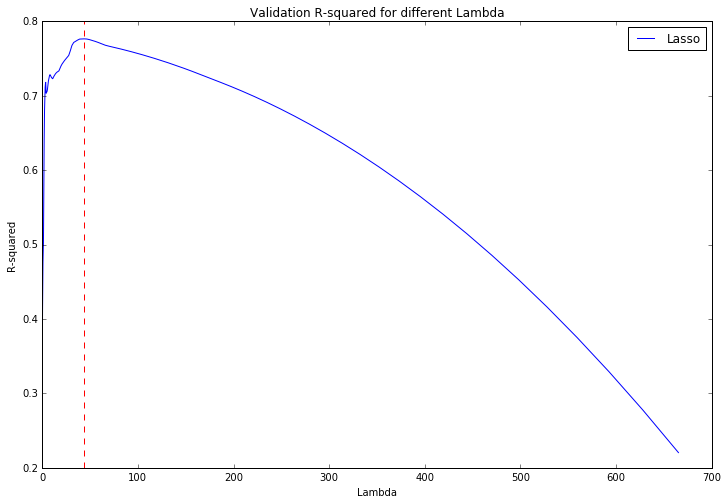

Optimal lambda for Lasso=43.9881200232


In [227]:
#select lambdas for Lasso 
lambdas=np.exp(np.linspace(-5,6.5,200))
lambda_l_optimal=Regularization_fit_lambda(2,X_train,y_train,lambdas,p=0.4,Graph=True)
print('Optimal lambda for Lasso={0}'.format(lambda_l_optimal))

In [228]:
Lasso=linear_model.Lasso(fit_intercept=True,alpha=lambda_l_optimal)
#try Ridge with a selected regularization parameter lambda

Lasso.fit(X_train,y_train)
# In the sample:
p_IS=Lasso.predict(X_train)
err_IS=p_IS-y_train
R_2_IS_Lasso=1-np.var(err_IS)/np.var(y_train)
print("The R-squared we found for IS Lasso is: {0}".format(R_2_IS_Ridge))

Lasso_coef=Lasso.coef_
#Out of sample
p_OS=Lasso.predict(X_test)
err_OS=p_OS-y_test
R_2_OS_Lasso=1-np.var(err_OS)/np.var(y_test)
print("The R-squared we found for OS Lasso is: {0}".format(R_2_OS_Lasso))

The R-squared we found for IS Lasso is: 0.928901209277
The R-squared we found for OS Lasso is: 0.67869427672


# Best of Luck!!